# <b>Phase 3: Data Analysis</b>

##### <b>Objectives:</b> 
- Analyze data to gain insights about music trends over 3 years
- Find out some of the best categories (best song/album/artist) in each year based on the stats

### <b><u>Step 1</u>: Import library</b>

These are the main libraries used for data crawling:
- `sys`: Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
- `numpy`: used to get spotipy's client_id, secret and redirect uri in .env file
- `pandas`: used to get accessed to .env files in system
- `matplotlib`: used to support write data to csv files
- `sklearn`: used to support write data to csv files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### <b><u>Step 2</u>: Get the songs DataFrame from songs exploration notebook for analyzing data</b>

At this step, we need to import the `songs_df` varialbe from the songs exploration notebook to analyze data.

In [3]:
%store -r songs_df
%store -r songs_model_df

----
### <b><u>Question 1</u>: Analyze the behaviour of how songs are released from January to December for 3 years</b>

**MEANING:** Know which month(s) of a year the music trend will be exploded with songs and understand how the music industry behave in the 3 recent years (2020, 2021 and 2022). From that, an artist could select the best time in a year to drop their new single/album.

**STEP 1:** Make a copy of song's DataFrame and then add 2 more columns to the DataFrame:
- `year`: represents the year that song is released.
- `month`: represents the month that song is released.

In [4]:
ques1_df = songs_df.copy()

ques1_df['year'] = ques1_df['released_date'].dt.year
ques1_df['month'] = ques1_df['released_date'].dt.month

**STEP 2:** Choose the songs that in between 2020 and 2022 released year and then group by with 2 columns `year` and `month` to get the number of songs. After that, reshape the result's DataFrame to 12 rows for 12 months and 3 columns for 3 years. Finally, convert this numpy array into DataFrame with columns are years and indexes are months.

In [46]:
num_songs_by_month_df = ques1_df[ques1_df['year'].between(2020, 2022)].groupby(['year', 'month']).size()
num_songs_by_month_df = num_songs_by_month_df.to_numpy().reshape(12, 3)
num_songs_by_month_df = pd.DataFrame(num_songs_by_month_df, columns=[2020, 2021, 2022], index=range(1, 13))

**STEP 3:** Visualize the result DataFrame by using line chart.

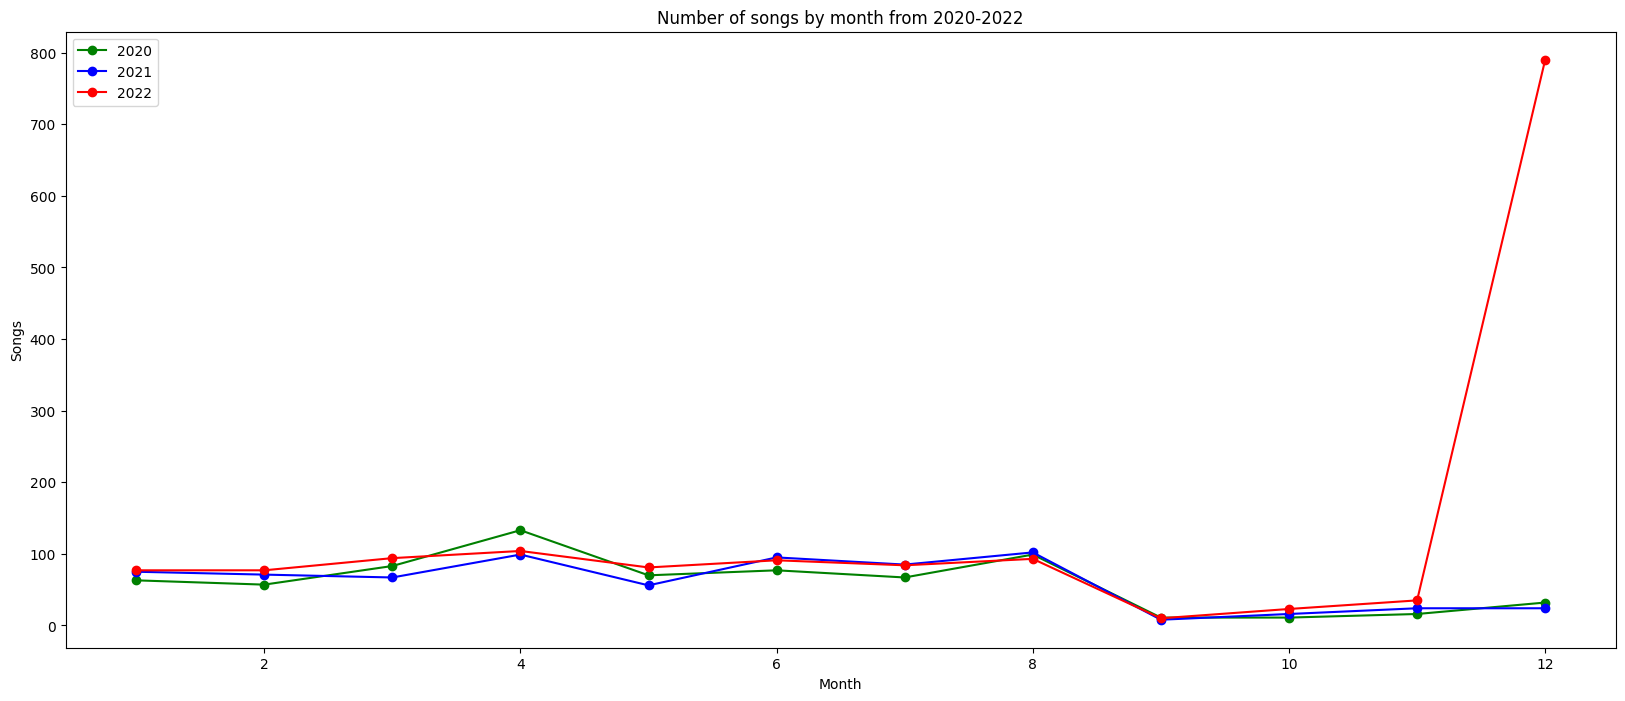

In [35]:
plt.figure(figsize=(20, 8))
plt.plot(num_songs_by_month_df.iloc[:, 0].keys(), num_songs_by_month_df.iloc[:, 0], '-go')
plt.plot(num_songs_by_month_df.iloc[:, 1].keys(), num_songs_by_month_df.iloc[:, 1], '-bo')
plt.plot(num_songs_by_month_df.iloc[:, 2].keys(), num_songs_by_month_df.iloc[:, 2], '-ro')

plt.legend([2020, 2021, 2022])
plt.xlabel("Month")
plt.ylabel("Songs")
plt.title('Number of songs by month from 2020-2022')
plt.show()

**COMMENT:** 
- We can clearly see a major difference between 2022 compared to 2020 and 2021.

- 2020 and 2021 has nearly exact same trendline in each month, with April and August has more songs released.

- Whereas in 2022, there is a dramatic increase in music industry where there are about 800 songs released in December, over 750 songs more compared to November. This could be the holiday seasons (Christmas, New Year's Eve) which explains the enormous amount of songs released

- Therefore, artists can now whether choose a month that has less songs for less competetion for their single/albums are choose an exploding month of songs such as December 2022 for celebrating holiday seasons.

### <b><u>Question 2</u>: Analyze the behaviour of how songs are released from January to December for 3 years</b>

**MEANING:** Know which month(s) of a year the music trend will be exploded with songs and understand how the music industry behave in the 3 recent years (2020, 2021 and 2022). From that, an artist could select the best time in a year to drop their new single/album.

**STEP 1:** Make a copy of song's DataFrame and then add 2 more columns to the DataFrame:
- `year`: represents the year that song is released.
- `month`: represents the month that song is released.

In [7]:
genres_2020 = songs_df[songs_df['released_date'].dt.year == 2020]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2020 = pd.DataFrame(genres_2020).rename(columns={'genres': 2020})

In [8]:
genres_2021 = songs_df[songs_df['released_date'].dt.year == 2021]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2021 = pd.DataFrame(genres_2021).rename(columns={'genres': 2021})

In [9]:
genres_2022 = songs_df[songs_df['released_date'].dt.year == 2022]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2022 = pd.DataFrame(genres_2022).rename(columns={'genres': 2022})

In [10]:
top_genres_df = pd.concat([top10_genres_2020, top10_genres_2021, top10_genres_2022], axis=1)

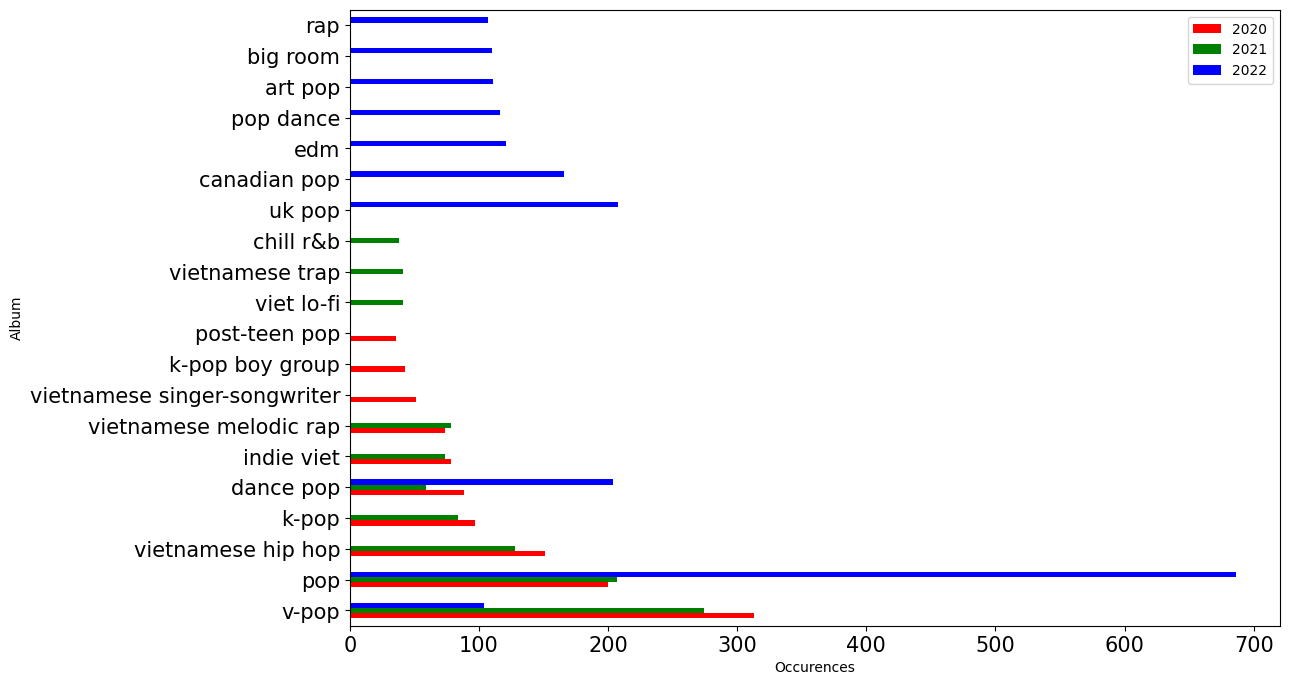

In [11]:
top_genres_df.plot(kind='barh', color=['r', 'g', 'b'], figsize=(12, 8), 
                        xlabel='Occurences', ylabel='Album', fontsize=15);

### <b><u>Question 5</u>: Song of the year 2020-2022</b>

In [39]:
songs_2020_df = songs_df[songs_df['released_date'].dt.year == 2020]
songs_2021_df = songs_df[songs_df['released_date'].dt.year == 2021]
songs_2022_df = songs_df[songs_df['released_date'].dt.year == 2022]

2020

In [13]:
songs_2020_df[songs_2020_df['popularity'] == songs_2020_df['popularity'].max()][['name', 'artist', 'popularity']]

,name,artist,popularity
2034,Blinding Lights,[The Weeknd],91


2021

In [14]:
songs_2021_df[songs_2021_df['popularity'] == songs_2021_df['popularity'].max()][['name', 'artist', 'popularity', 'released_date']]

,name,artist,popularity,released_date
1000,Until I Found You,[Stephen Sanchez],89,2021-09-01
1023,Sunroof,"[Nicky Youre, dazy]",89,2021-12-03


2022

In [15]:
songs_2022_df[songs_2022_df['popularity'] == songs_2022_df['popularity'].max()][['name', 'artist', 'popularity', 'artist_popularity', 'album_popularity']]

,name,artist,popularity,artist_popularity,album_popularity
118,Unholy (feat. Kim Petras),"[Sam Smith, Kim Petras]",100,100,88


### <b><u>Question 6</u>: Album of the year 2020-2022</b>

2020

In [16]:
songs_2020_df[songs_2020_df['album_popularity'] == songs_2020_df['album_popularity'].max()][['album', 'artist']]

,album,artist
2033,After Hours,[The Weeknd]
2034,After Hours,[The Weeknd]
2115,After Hours,[The Weeknd]
2285,After Hours,[The Weeknd]
2384,After Hours,[The Weeknd]


2021

In [17]:
songs_2021_df[songs_2021_df['album_popularity'] == songs_2021_df['album_popularity'].max()][['album', 'artist']]

,album,artist
1032,SOUR,[Olivia Rodrigo]
1071,SOUR,[Olivia Rodrigo]
1074,SOUR,[Olivia Rodrigo]
1075,SOUR,[Olivia Rodrigo]
1117,SOUR,[Olivia Rodrigo]
1218,SOUR,[Olivia Rodrigo]
1238,SOUR,[Olivia Rodrigo]
1289,SOUR,[Olivia Rodrigo]
1469,SOUR,[Olivia Rodrigo]
1585,SOUR,[Olivia Rodrigo]


2022

In [18]:
songs_2022_df[songs_2022_df['album_popularity'] == songs_2022_df['album_popularity'].max()][['album', 'artist']]

,album,artist
122,Midnights,[Taylor Swift]
211,Midnights,[Taylor Swift]
218,Midnights,"[Taylor Swift, Lana Del Rey]"
288,Midnights,[Taylor Swift]
400,SOS,[SZA]
604,Midnights,[Taylor Swift]
605,Midnights,[Taylor Swift]


### <b><u>Question 7</u>: Artist of the year 2020-2022</b>

2020

In [19]:
temp = songs_2020_df[songs_2020_df['artist_popularity'] == songs_2020_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['Taylor Swift']

2021

In [20]:
temp = songs_2021_df[songs_2021_df['artist_popularity'] == songs_2021_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['Taylor Swift']

2022

In [21]:
temp = songs_2022_df[songs_2022_df['artist_popularity'] == songs_2022_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['David Guetta']

### <b><u>Question 7</u>: Vietnamese song of the year</b>

In [22]:
def isVietnamese(c):
    if type(c) == list:
        for i in c:
            if 'v-pop' in i or 'vietnamese' in i:
                return True
    return False

viet_songs_2020_df = songs_2020_df[songs_2020_df['genres'].apply(isVietnamese)]
viet_songs_2021_df = songs_2021_df[songs_2021_df['genres'].apply(isVietnamese)]
viet_songs_2022_df = songs_2022_df[songs_2022_df['genres'].apply(isVietnamese)]

2020

In [23]:
viet_songs_2020_df[viet_songs_2020_df['popularity'] == viet_songs_2020_df['popularity'].max()][['name', 'artist', 'popularity']]

,name,artist,popularity
2369,2 Phút Hơn - KAIZ Remix,"[Pháo, KAIZ]",63


2021

In [24]:
viet_songs_2021_df[viet_songs_2021_df['popularity'] == viet_songs_2021_df['popularity'].max()][['name', 'artist', 'popularity']]

,name,artist,popularity
1026,Chuyện Đôi Ta (feat. Muộii),"[Emcee L (Da LAB), Muộii]",66


2022

In [25]:
viet_songs_2022_df[viet_songs_2022_df['popularity'] == viet_songs_2022_df['popularity'].max()][['name', 'artist', 'popularity']]

,name,artist,popularity
26,vaicaunoicokhiennguoithaydoi,"[GREY D, tlinh]",66


### <b><u>Question 8</u>: Vietnamese album of the year</b>

2020

In [26]:
viet_songs_2020_df[viet_songs_2020_df['album_popularity'] == viet_songs_2020_df['album_popularity'].max()][['album', 'artist', 'album_popularity']]

,album,artist,album_popularity
2369,2 Phút Hơn (KAIZ Remix),"[Pháo, KAIZ]",51


2021

In [27]:
viet_songs_2021_df[viet_songs_2021_df['album_popularity'] == viet_songs_2021_df['album_popularity'].max()][['album', 'artist', 'album_popularity']]

,album,artist,album_popularity
1026,Chuyện Đôi Ta (feat. Muộii),"[Emcee L (Da LAB), Muộii]",55


2022

In [28]:
viet_songs_2022_df[viet_songs_2022_df['album_popularity'] == viet_songs_2022_df['album_popularity'].max()][['album', 'artist', 'album_popularity']]

,album,artist,album_popularity
41,Một Vạn Năm,"[Vũ., TRANG]",57
138,Một Vạn Năm,[Vũ.],57
140,Một Vạn Năm,[Vũ.],57
234,Một Vạn Năm,[Vũ.],57
662,Một Vạn Năm,[Vũ.],57


### <b><u>Question 9</u>: Vietnamese artist of the year</b>

2020

In [29]:
temp = viet_songs_2020_df[viet_songs_2020_df['artist_popularity'] == viet_songs_2020_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['RAP VIỆT', 'Binz', 'JustaTee', 'Karik', 'Rhymastic', 'Suboi', 'Wowy']

2021

In [30]:
temp = viet_songs_2021_df[viet_songs_2021_df['artist_popularity'] == viet_songs_2021_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['Rhymastic', 'Binz']

2022

In [31]:
temp = viet_songs_2022_df[viet_songs_2022_df['artist_popularity'] == viet_songs_2022_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['Suni Hạ Linh', 'Hoàng Dũng', 'GREY D', 'Orange']

In [63]:
def quarter(x):
    if x in [1, 2, 3]:
        return 1
    elif x in [4, 5, 6]:
        return 2
    elif x in [7, 8, 9]:
        return 3
    return 4

ques1_df['quarter'] = ques1_df['month'].apply(quarter)

In [64]:
ques1_df.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,popularity,main_genre,artists_count,year,month,quarter
0,1RDvyOk4WtPCtoqciJwVn8,Dreamers [Music from the FIFA World Cup Qatar ...,"[Jung Kook, BTS, FIFA Sound]","[k-pop boy group, k-pop]",58961886,100,183,Dreamers [Music from the FIFA World Cup Qatar ...,2022-11-20,81,201391,92,k-pop boy group,3,2022,11,4
1,6A1IbMKwjvXibcrU1sdqKH,Em Là,"[MONO, Onionn]",None,100162,77,182,22,2022-08-18,60,197333,62,None,2,2022,8,3
2,7bFFUPBiF15n8m8RziqS4o,dự báo thời tiết hôm nay mưa,[GREY D],[v-pop],39690,56,182,dự báo thời tiết hôm nay mưa – Maxi Single,2022-11-22,52,281493,62,v-pop,1,2022,11,4
3,4QjxvzEFwb63NZ1pp3wvHy,Chết Trong Em,[Thịnh Suy],"[vietnamese singer-songwriter, v-pop]",359817,54,183,Chết Trong Em,2022-10-31,50,256663,62,vietnamese singer-songwriter,1,2022,10,4
4,5p8ThxM2OhJ0igfxkz0Z1q,Wild Flower (with youjeen),[RM],[k-rap],12005881,81,183,Indigo,2022-12-02,85,273499,88,k-rap,1,2022,12,4


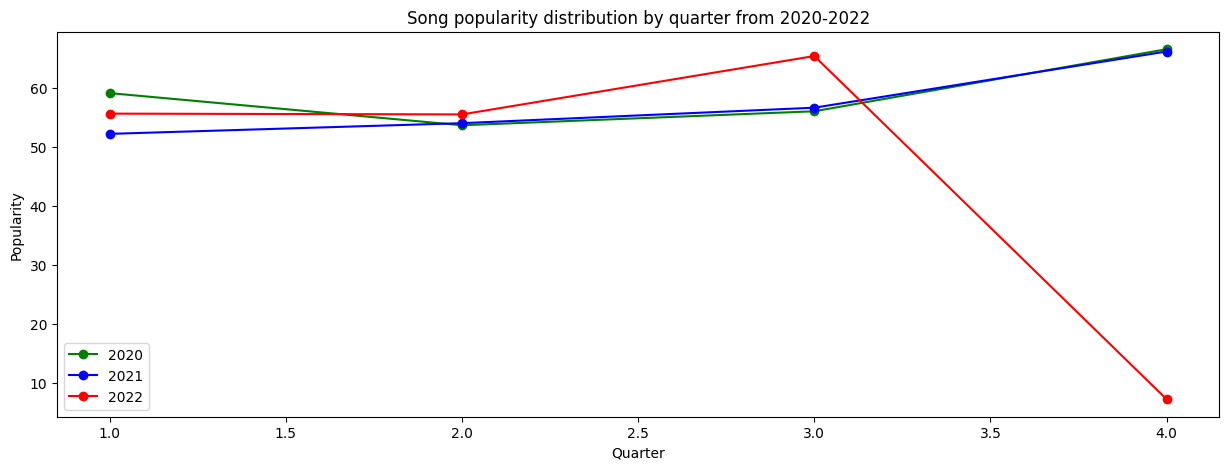

In [75]:
num_songs_by_month_df = ques1_df[ques1_df['year'].between(2020, 2022)].groupby(['year', 'quarter'])['popularity'].mean()
num_songs_by_month_df = num_songs_by_month_df.to_numpy().reshape(4, 3)
num_songs_by_month_df = pd.DataFrame(num_songs_by_month_df, columns=[2020, 2021, 2022], index=range(1, 5))

plt.figure(figsize=(15, 5))
plt.plot(num_songs_by_month_df.iloc[:, 0].keys(), num_songs_by_month_df.iloc[:, 0], '-go')
plt.plot(num_songs_by_month_df.iloc[:, 1].keys(), num_songs_by_month_df.iloc[:, 1], '-bo')
plt.plot(num_songs_by_month_df.iloc[:, 2].keys(), num_songs_by_month_df.iloc[:, 2], '-ro')

plt.legend([2020, 2021, 2022])
plt.xlabel("Quarter")
plt.ylabel("Popularity")
plt.title('Song popularity distribution by quarter from 2020-2022')
plt.show()

----
### <b> This is the end of Phase 3</b>